In [1]:
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

import numpy as np
import random
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import argparse
# Importing necssary modules
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix
import math
import random
import warnings
from collections import Counter
# Custom script 
#%matplotlibe inline

In [2]:
# import urllib2
import os, sys
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn import feature_extraction
from sklearn import preprocessing
from random import seed, shuffle

# import utils as ut

SEED = 1234
seed(SEED)
np.random.seed(SEED)


def load_law():
    FEATURES_CLASSIFICATION = ["decile1b", "decile3", "lsat", "ugpa", "zfygpa","zgpa", "fulltime", "fam_inc", "sex", "race", "tier"]  # features to be used for classification
    CONT_VARIABLES = ["lsat", "ugpa", "zfygpa", "zgpa"]  # continuous features, will need to be handled separately from categorical features, categorical features will be encoded using one-hot
    CLASS_FEATURE = "y"  # the decision variable
    SENSITIVE_ATTRS = ["sex"]
    CAT_VARIABLES = ["decile1b", "decile3", "fulltime", "fam_inc", "sex", "race", "tier"]
    CAT_VARIABLES_INDICES = [1,2,7,8,9,10,11]
    # COMPAS_INPUT_FILE = "bank-full.csv"
    INPUT_FILE = "./datasets/law.csv"

    df = pd.read_csv(INPUT_FILE)
    
    # convert to np array
    data = df.to_dict('list')
    print(data.keys())
    for k in data.keys():
        data[k] = np.array(data[k])

    """ Feature normalization and one hot encoding """

    # convert class label 0 to -1
    y = data[CLASS_FEATURE]
    #print(np.unique(y))
    #y[y == 0] = 1
    #y[y==0] = -1
    #y[y == 1] = -1
    y = np.array([int(k) for k in y])

    X = np.array([]).reshape(len(y), 0)  # empty array with num rows same as num examples, will hstack the features to it
    
    x_control = defaultdict(list)
    i=0
    feature_names = []
    
    for attr in FEATURES_CLASSIFICATION:
        vals = data[attr]
        
        if attr in CONT_VARIABLES:
            vals = [float(v) for v in vals]
            vals = preprocessing.scale(vals)  # 0 mean and 1 variance
            vals = np.reshape(vals, (len(y), -1))  # convert from 1-d arr to a 2-d arr with one col
            

        else:  # for binary categorical variables, the label binarizer uses just one var instead of two
            lb = preprocessing.LabelBinarizer()
            lb.fit(vals)
            vals = lb.transform(vals)
           
            #if attr == 'job':
            #    print(lb.classes_)
            #    print(lb.transform(lb.classes_))
            
           
            
            
        # add to sensitive features dict
        if attr in SENSITIVE_ATTRS:
            x_control[attr] = vals
            

        # add to learnable features
        X = np.hstack((X, vals))
        
        if attr in CONT_VARIABLES:  # continuous feature, just append the name
            feature_names.append(attr)
        else:  # categorical features
            if vals.shape[1] == 1:  # binary features that passed through lib binarizer
                feature_names.append(attr)
            else:
                for k in lb.classes_:  # non-binary categorical features, need to add the names for each cat
                    feature_names.append(attr + "_" + str(k))

    # convert the sensitive feature to 1-d array
    
    x_control = dict(x_control)
    
    for k in x_control.keys():
        assert (x_control[k].shape[1] == 1)  # make sure that the sensitive feature is binary after one hot encoding
        x_control[k] = np.array(x_control[k]).flatten()
    
    feature_names.append('target')
    
   
    print(feature_names)
    return X, y, feature_names.index(SENSITIVE_ATTRS[0]), 1, x_control

X,y, sa_index, p_Group, x_control= load_law()

print(X)
#print(X[0])
#print(X[0][1])
#print(sa_index)
np_Group = 0 #non-protected group's sa_value
Y = []
for i in y:
    if (i == 0):
        Y.append(1)
    else:
        Y.append(0)
        
Y = np.array(Y)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
Xtr = x_train
Xte = x_test
Ytr = y_train
Yte = y_test
X.shape

dict_keys(['decile1b', 'decile3', 'lsat', 'ugpa', 'zfygpa', 'zgpa', 'fulltime', 'fam_inc', 'sex', 'race', 'tier', 'y'])
['decile1b_1', 'decile1b_2', 'decile1b_3', 'decile1b_4', 'decile1b_5', 'decile1b_6', 'decile1b_7', 'decile1b_8', 'decile1b_9', 'decile1b_10', 'decile3_1', 'decile3_2', 'decile3_3', 'decile3_4', 'decile3_5', 'decile3_6', 'decile3_7', 'decile3_8', 'decile3_9', 'decile3_10', 'lsat', 'ugpa', 'zfygpa', 'zgpa', 'fulltime', 'fam_inc_1', 'fam_inc_2', 'fam_inc_3', 'fam_inc_4', 'fam_inc_5', 'sex', 'race', 'tier_1', 'tier_2', 'tier_3', 'tier_4', 'tier_5', 'tier_6', 'target']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(18692, 38)

In [3]:

def create_clients(image_list, label_list, num_clients, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as 
                data shards - tuple of images and label lists.
        args: 
            image_list: a list of numpy arrays of training images
            label_list:a list of binarized labels for each image
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1 
            
    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    data = list(zip(image_list, label_list))
    random.shuffle(data)

    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))} 

In [4]:
#clients = create_clients(Xtr, Ytr, num_clients=10, initial='client')

In [5]:
#maryam: create test data for each client
clients_test_data = create_clients(Xte, Yte, num_clients=3, initial='client')
clients = create_clients(Xtr, Ytr, num_clients=3, initial='client')
def batch_data(data_shard, bs=30):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

In [6]:
#maryam: batch clients test data
clients_test_data_batched = dict()
for (client_name, data) in clients_test_data.items():
    clients_test_data_batched[client_name] = batch_data(data)
    
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)
#process and batch the test set  
test_batched = tf.data.Dataset.from_tensor_slices((Xte, Yte)).batch(len(Yte))
#print('Number of client datasets: {l}'.format(l=len(test_batched)))

In [7]:

client_names = list(clients_batched.keys())
bs = list(clients_batched[client_name])[0][0].shape[0] #?? what is this bs?
#first calculate the total training data points across clinets
global_count = sum([tf.data.experimental.cardinality(clients_batched[client_name]).numpy() for client_name in client_names])*bs
local_count = tf.data.experimental.cardinality(clients_batched['client_1']).numpy()*bs
print(global_count) ##??where do we use these counts
print(local_count)

15030
5010


In [8]:
print('Number of client datasets: {l}'.format(l=len(clients_batched)))
print('First dataset: {d}'.format(d=clients_batched['client_1']))
#maryam: check length of number of test datasets created for clients
print('Number of client test datasets: {l}'.format(l=len(clients_test_data_batched)))

Number of client datasets: 3
First dataset: <BatchDataset shapes: ((None, 38), (None,)), types: (tf.float64, tf.int32)>
Number of client test datasets: 3


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,InputLayer
from tensorflow.keras.callbacks import EarlyStopping
class SimpleMLP:
    @staticmethod
    def build(x_train,n):
        
        model = Sequential()
        model.add(InputLayer(input_shape=(x_train.shape[1],)))
        model.add(Dense(x_train.shape[1],activation='relu'))#,input_shape=(x_train.shape[1],)))
        #model.add(BatchNormalization())
        model.add(Dropout(0.25))
        model.add(Dense(n*x_train.shape[1],activation='relu'))
        #model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(n*x_train.shape[1],activation='relu'))

        model.add(Dense(1,activation='sigmoid'))
        return model

In [10]:
lr = 0.0001 
comms_round = 50
loss='binary_crossentropy'
metrics = ['accuracy']
optimizer = Adam(learning_rate=lr)
'''
optimizer = SGD(lr=lr, 
                decay=lr / comms_round, 
                momentum=0.9
               )  
'''

'\noptimizer = SGD(lr=lr, \n                decay=lr / comms_round, \n                momentum=0.9\n               )  \n'

In [11]:

def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad

def find_statistical_parity_score(data,labels,predictions):
    protected_pos = 0.
    protected_neg = 0.
    non_protected_pos = 0.
    non_protected_neg = 0.
    '''
    tp_protected = 0.
    tn_protected = 0.
    fp_protected = 0.
    fn_protected = 0.

    tp_non_protected = 0.
    tn_non_protected = 0.
    fp_non_protected = 0.
    fn_non_protected = 0.
    '''
    saIndex = sa_index
    saValue = p_Group
    
    for idx, val in enumerate(data):
        # protected population
        if val[saIndex] == saValue:
            if predictions[idx] == 1:
                protected_pos += 1.
            else:
                protected_neg += 1.
            # correctly classified
            #if labels[idx] == predictions[idx]:
            #    if labels[idx] == 1:
            #        tp_protected += 1.
            #    else:
            #        tn_protected += 1.
            # misclassified
            #else:
            #    if labels[idx] == 1:
            #        fn_protected += 1.
            #    else:
            #        fp_protected += 1.

        else:
            if predictions[idx] == 1:
                non_protected_pos += 1.
            else:
                non_protected_neg += 1.

            # correctly classified
            #if labels[idx] == predictions[idx]:
            #    if labels[idx] == 1:
            #        tp_non_protected += 1.
            #    else:
            #        tn_non_protected += 1.
            # misclassified
            #else:
            #    if labels[idx] == 1:
            #        fn_non_protected += 1.
            #    else:
            #        fp_non_protected += 1.

    #tpr_protected = tp_protected / (tp_protected + fn_protected)
    #tnr_protected = tn_protected / (tn_protected + fp_protected)

    #tpr_non_protected = tp_non_protected / (tp_non_protected + fn_non_protected)
    #tnr_non_protected = tn_non_protected / (tn_non_protected + fp_non_protected)

    C_prot = (protected_pos) / (protected_pos + protected_neg)
    C_non_prot = (non_protected_pos) / (non_protected_pos + non_protected_neg)

    stat_par = C_non_prot - C_prot
    '''
    print("protected_pos: %s" %protected_pos)
    print("protected_neg: %s" %protected_neg)
    print("non-protected_pos: %s" %non_protected_pos)
    print("non-protected_neg: %s" %non_protected_neg)
    '''
    return stat_par
    
def find_eqop_score(data,labels,predictions):
    '''
    protected_pos = 0.
    protected_neg = 0.
    non_protected_pos = 0.
    non_protected_neg = 0.
    '''
    tp_protected = 0.
    tn_protected = 0.
    fp_protected = 0.
    fn_protected = 0.

    tp_non_protected = 0.
    tn_non_protected = 0.
    fp_non_protected = 0.
    fn_non_protected = 0.
    saIndex = sa_index
    saValue = p_Group
    for idx, val in enumerate(data):
        # protrcted population
        if val[saIndex] == saValue:
            #if predictions[idx] == 1:
            #    protected_pos += 1.
            #else:
            #    protected_neg += 1.

            # correctly classified
            if labels[idx] == predictions[idx]:
                if labels[idx] == 1:
                    tp_protected += 1.
                else:
                    tn_protected += 1.
            # misclassified
            else:
                if labels[idx] == 1:
                    fn_protected += 1.
                else:
                    fp_protected += 1.

        else:
            #if predictions[idx] == 1:
            #    non_protected_pos += 1.
            #else:
            #    non_protected_neg += 1.

            # correctly classified
            if labels[idx] == predictions[idx]:
                if labels[idx] == 1:
                    tp_non_protected += 1.
                else:
                    tn_non_protected += 1.
            # misclassified
            else:
                if labels[idx] == 1:
                    fn_non_protected += 1.
                else:
                    fp_non_protected += 1.

    tpr_protected = tp_protected / (tp_protected + fn_protected)
    #tnr_protected = tn_protected / (tn_protected + fp_protected)

    tpr_non_protected = tp_non_protected / (tp_non_protected + fn_non_protected)
    #tnr_non_protected = tn_non_protected / (tn_non_protected + fp_non_protected)

    
    eqop = tpr_non_protected - tpr_protected
    return eqop

from sklearn.metrics import f1_score

def test_client_model(X_test, Y_test,  model):
    
    cce = tf.keras.losses.BinaryCrossentropy()
    logits = model.predict(X_test)
    preidect = np.around(logits)
    preidect = np.nan_to_num(preidect)
    Y_test = np.nan_to_num(Y_test)
    conf = (confusion_matrix(Y_test,preidect)) 
    TN = conf[0][0]
    FP = conf[0][1]
    FN = conf[1][0]
    TP = conf[1][1]
    sensitivity = TP/(TP+FN) 
    specificity = TN/(FP+TN)
        
    BalanceACC = (sensitivity+specificity)/2
    stat_parity = find_statistical_parity_score(X_test,Y_test,preidect)
    assigned_positive_labels = 0
    total_positive_labels = 0
    
    
    unique, counts = np.unique(preidect, return_counts=True)
    count_ap_dict = dict(zip(unique, counts))
    assigned_positive_labels = count_ap_dict.get(1,0)
    
    unique, counts = np.unique(Y_test, return_counts=True)
    count_tp_dict = dict(zip(unique, counts))
    total_positive_labels = count_tp_dict.get(1,0)
    
    '''
    for i in range(len(preidect)):
        if preidect[i]==1:
            assigned_positive_labels+=1
        if Y_test[i]==1:
            total_positive_labels+=1
    '''    
    eqop = find_eqop_score(X_test,Y_test,preidect) 
    print('eqop: {}'.format(eqop))
    return eqop, assigned_positive_labels, total_positive_labels, BalanceACC
    #print('stat_parity: {}'.format(stat_parity))
    
    #return stat_parity, assigned_positive_labels, total_positive_labels, BalanceACC
    
def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.BinaryCrossentropy()
    logits = model.predict(X_test)
    preidect = np.around(logits)
    preidect = np.nan_to_num(preidect)
    Y_test = np.nan_to_num(Y_test)
    stat_parity = find_statistical_parity_score(X_test,Y_test,preidect)
    eqop = find_eqop_score(X_test,Y_test,preidect)    
        
    conf = (confusion_matrix(Y_test,preidect))   
    loss = cce(Y_test, preidect)
    acc = accuracy_score(preidect,Y_test)
    print('comm_round: {} | global_acc: {} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss,conf,stat_parity, eqop

def find_class_Weight(labels,majority_label,minority_label):
    unique, counts = np.unique(labels, return_counts=True)
    count_ap_dict = dict(zip(unique, counts))
    
    majority_class_weight = 1
    minority_class_weight = count_ap_dict.get(majority_label,0)/count_ap_dict.get(minority_label,1)
    class_weights={majority_label:1,minority_label:minority_class_weight}
    return class_weights
    
    

In [12]:



# bulid K-SMOTE algorithem
# input (dmin, dmaj, K=number of data sample from dmin to upsampling, r=ratio of samples to reate in compare to dmaj)
# output(synthatic data for a client)
import random
from imblearn.over_sampling import SMOTENC

def k_nearest_neighbors(data, predict, k):
    #k=8
    #if len(data) >= k:
    #    warnings.warn('K is set to a value less than total voting groups!')

    distances = []
    count = 0
    for sample in data:
        euclidean_distance = np.linalg.norm(np.array(sample)-np.array(predict))
        distances.append([euclidean_distance,count])
        count+=1
    
    votes = [i[1] for i in sorted(distances)[:k]] ##votes is returning indexes of k random samples

    #vote_result = Counter(votes).most_common(9)[0][0]
    return votes


def fair_k_nearest_neighbors(data, predict, k):
    #k=8
    #if len(data) >= k:
    #    warnings.warn('K is set to a value less than total voting groups!')

    distances = []
    count = 0
    for sample in data:
        euclidean_distance = np.linalg.norm(np.array(sample)-np.array(predict))
        distances.append([euclidean_distance,count])
        count+=1
    
    votes = [i[1] for i in sorted(distances)[:k]] ##votes is returning indexes of k random samples

    #vote_result = Counter(votes).most_common(9)[0][0]
    return votes

##algo 2:

def fair_kSMOTE_algo_2(dmajor,dminor,k,r):
    S = []
    Ns =  int(r*(len(dmajor)))
    
    Nks = int(Ns / (k-1))
    difference = Ns-Nks*(k-1)
    
    rb = []
    #pick a random k sample from dmin and save them in rb
    dmin_rand = random.sample(dminor, k-1)   
    #for debugging
    sens_attr_vals = []
    i = 0
    
    #do algorithem (choose the nearest neighbor and linear interpolation)
    for xb in dmin_rand:
        N= k_nearest_neighbors(dminor,xb,k) #from minority-p
        
        #do linear interpolation
        Sxb = []
        
        if i==0:
            Nkss = Nks+difference
        else:
            Nkss = Nks
        
        i+=1
        for s in range(Nkss):
            
            
            j = 1  ##?? j?
            #randome k sample
            #j = random.randint(0, len(N))
            
            ##here nearst neghber insted of dminor
            #linear interpolation
            x_new = abs(((dminor[N[j]]-xb) * random.sample(range(0, 1), 1)))
            j+=1
            
            while(j < len(N)):
                #here on random xb
                ind = N[j]
                x_new = abs(x_new + ((dminor[ind]-xb) * random.sample(range(0, 1), 1)))
                j += 1
                
            x_new = x_new / (len(N)-1) ##??? why scaling with k here
            Synthesized_instance = xb + x_new ##?> why we need to sum xb and x_new
            
            
            #for algo 3 when finding nearest neighbors from min_np and assigning the 
            #'p' sensitive value to all synthesized instances
            #Synthesized_instance[sa_index] = xb[sa_index] 
            Sxb.append(Synthesized_instance)
        
            
            
            
            
        S.append(Sxb)
    
    
    
    return S



###algo 3, algo 3 x_synthesized as a mixture of nearest neighbors from dmin-p and dmin-np

def fair_kSMOTE(dmajor,dminor_wg,dminor,k,r):
    S = []
    #Ns =  int(r*(len(dmajor) - len(dminor)))
    Ns =  int(r*(len(dmajor)))
    
    
    Nks = int(Ns / (k-1))
    difference = Ns-Nks*(k-1)
    #if r==-1:
    #    Nks = 1
    rb = []
    #pick a random k sample from dmin and save them in rb
    dmin_rand = random.sample(dminor, k-1)   
    #for debugging
    sens_attr_vals = []
    
    
    #do algorithem (choose the nearest neighbor and linear interpolation)
    i = 0
    
    for xb in dmin_rand:
        N= k_nearest_neighbors(dminor,xb,int(k/2)+1) #from minority-p
        N2= k_nearest_neighbors(dminor_wg,xb,int(k/2)) #from minority-np
    
        N3 = np.hstack((N, N2))
        if i==0:
            Nkss = Nks+difference
        else:
            Nkss = Nks
        
        i+=1
        #do linear interpolation
        Sxb = []
        
        for s in range(Nkss):
            
            j = 1  ##?? j?
            #randome k sample
            #j = random.randint(0, len(N))
            
            ##here nearst neghber insted of dminor
            #linear interpolation
            x_new = abs(((dminor[N[j]]-xb) * random.sample(range(0, 1), 1)))
            j+=1
            
            while(j < len(N)):
                #here on random xb
                ind = N[j]
                
                x_new = abs(x_new + ((dminor[ind]-xb) * random.sample(range(0, 1), 1)))
                j += 1
            j = 0
            while(j < len(N2)):
                #here on random xb
                ind = N2[j]
                
                x_new = abs(x_new + ((dminor_wg[ind]-xb) * random.sample(range(0, 1), 1)))
                j += 1    
            x_new = x_new / (len(N3)-1) ##??? why scaling with k here
            Synthesized_instance = xb + x_new ##?> why we need to sum xb and x_new
            
            
            #for algo 3 when finding nearest neighbors from min_np and assigning the 
            #'p' sensitive value to all synthesized instances
            Synthesized_instance[sa_index] = xb[sa_index] 
            Sxb.append(Synthesized_instance)
        
            
            
            
            
        S.append(Sxb)
    
    
   
    return S


##algo 3 x_synthesized separately for nearest neighbors from dmin-p and dmin-np
'''
def fair_kSMOTE(dmajor,dminor_wg,dminor,k,r):
    S = []
    Ns =  int(r*(len(dmajor) - len(dminor)))
    #print("Ns %s" % Ns)
    Nks = int(Ns / (k-1))
    #print("Nks%s"%Nks)
    rb = []
    #pick a random k sample from dmin and save them in rb
    dmin_rand = random.sample(dminor, k)   
    #for debugging
    sens_attr_vals = []
    
    
    #do algorithem (choose the nearest neighbor and linear interpolation)
    for xb in dmin_rand:
        N= k_nearest_neighbors(dminor,xb,int(k/2)+1) #from minority-p
        N2= k_nearest_neighbors(dminor_wg,xb,int(k/2)) #from minority-np
        
        #do linear interpolation
        Sxb = []
        for s in range(int(Nks/2)):
            j = 1  ##?? j?
            #randome k sample
            #j = random.randint(0, len(N))
            
            ##here nearst neghber insted of dminor
            #linear interpolation
            x_new = ((dminor[N[j]]-xb) * random.sample(range(0, 1), 1))
            j+=1
            
            while(j < len(N)):
                #here on random xb
                ind = N[j]
                x_new = x_new + ((dminor[ind]-xb) * random.sample(range(0, 1), 1))
                j += 1
                
            x_new = x_new / (len(N)-1) ##??? why scaling with k here
            Synthesized_instance = xb + x_new ##?> why we need to sum xb and x_new
            
            #for debugging
            sens_attr_vals.append(Synthesized_instance[13])
            #for algo 3 when finding nearest neighbors from min_np and assigning the 
            #'p' sensitive value to all synthesized instances
            Synthesized_instance[sa_index] = xb[sa_index] 
            Sxb.append(Synthesized_instance)
            
            
            j = 1  ##?? j?
            #randome k sample
            #j = random.randint(0, len(N))
            
            ##here nearst neghber insted of dminor
            #linear interpolation
            x_new = ((dminor[N2[j]]-xb) * random.sample(range(0, 1), 1))
            j+=1
            
            while(j < len(N2)):
                #here on random xb
                ind = N2[j]
                x_new = x_new + ((dminor[ind]-xb) * random.sample(range(0, 1), 1))
                j += 1
                
            x_new = x_new / len(N2) ##??? why scaling with k here
            Synthesized_instance = xb + x_new ##?> why we need to sum xb and x_new
            Synthesized_instance[sa_index] = xb[sa_index] 
            Sxb.append(Synthesized_instance)         
            
        S.append(Sxb)
    
    
    
    return S
'''   
##algo 4 
'''
def fair_kSMOTE(dmajor,dminor_wg,dminor,dmin_client,k,r):
    S = []
    Ns =  int(r*(len(dmajor) - len(dminor)))
    #print("Ns %s" % Ns)
    Nks = int(Ns / (k-1))
    #print("Nks%s"%Nks)
    rb = []
    #pick a random k sample from dmin and save them in rb
    dmin_rand = random.sample(dminor, k)   
    #for debugging
    sens_attr_vals = []
    
    
    #do algorithem (choose the nearest neighbor and linear interpolation)
    for xb in dmin_rand:
        N= k_nearest_neighbors(dmin_client,xb,k) #from dmin-p and dmin-np
        
        
        #do linear interpolation
        Sxb = []
        for s in range(Nks):
            j = 1  ##?? j?
            #randome k sample
            #j = random.randint(0, len(N))
            
            ##here nearst neghber insted of dminor
            #linear interpolation
            x_new = ((dmin_client[N[j]]-xb) * random.sample(range(0, 1), 1))
            j+=1
            
            while(j < len(N)):
                #here on random xb
                ind = N[j]
                x_new = x_new + ((dmin_client[ind]-xb) * random.sample(range(0, 1), 1))
                j += 1
                
            x_new = x_new / (len(N)-1) ##??? why scaling with k here
            Synthesized_instance = xb + x_new ##?> why we need to sum xb and x_new
            
            
            #for algo 4 when finding nearest neighbors from min_np and assigning the 
            #'p' sensitive value to all synthesized instances
            Synthesized_instance[sa_index] = xb[sa_index] 
            Sxb.append(Synthesized_instance)
                    
            
        S.append(Sxb)    
    
    return S

'''
def kSMOTE(dmajor,dminor,k,r):
    S = []
    Ns = int(r * (len(dmajor) - len(dminor)))
    Nks = int(Ns / k)
    rb = []
    #pick a random k sample from dmin and save them in rb
    dmin_rand = random.sample(dminor, k)   
    #for debugging
    sens_attr_vals = []
    
    
    #do algorithem (choose the nearest neighbor and linear interpolation)
    for xb in dmin_rand:
        N= k_nearest_neighbors(dminor,xb,k)
        
        
        #do linear interpolation
        Sxb = []
        for s in range(Nks):
            j = 1  ##?? j?
            #randome k sample
            #j = random.randint(0, len(N))
            
            ##here nearst neghber insted of dminor
            #linear interpolation
            x_new = ((dminor[N[j]]-xb) * random.sample(range(0, 1), 1))
            j+=1
            
            while(j < len(N)):
                #here on random xb
                ind = N[j]
                x_new = abs(x_new + ((dminor[ind]-xb) * random.sample(range(0, 1), 1)))
                j += 1
                
            x_new = x_new / len(N) ##??? why scaling with k here
            Synthesized_instance = xb + x_new ##?> why we need to sum xb and x_new
            
            #for debugging
            sens_attr_vals.append(Synthesized_instance[10])
            
            #Synthesized_instance[sa_index] = xb[sa_index] ##Smote is synthesizing the values as if they are numbers but sensitive attribute 
                                                          ## is binary so we need to keep it binary
            Sxb.append(Synthesized_instance)
            
            
            
            
        S.append(Sxb)
    
    
    
    return S

def splitYtrain_smotenc(Xtr,Ytr,minority_lable):
  
    dmaj_x = []
    dmin_x = []
    label_maj_x = []
    label_min_x = []
    
    for i in range(len(Ytr)):
        if((Ytr[i]) == minority_lable):
            dmin_x.append(Xtr[i])
            label_min_x.append(Ytr[i])
        else:
            dmaj_x.append(Xtr[i])
            label_maj_x.append(Ytr[i])
    
    return dmaj_x,dmin_x, label_min_x, label_maj_x
def splitYtrain(Xtr,Ytr,minority_lable):
    #print(Ytr)
    dmaj_x = []
    dmin_x = []
    
    
    for i in range(len(Ytr)):
        if((Ytr[i]) == minority_lable):
            dmin_x.append(Xtr[i])
            
        else:
            dmaj_x.append(Xtr[i])
            
    
    return dmaj_x,dmin_x
def splitYtrain_sa_value(Xtr,Ytr,minority_lable,majority_label): #splite Ytrain based on sensitive attribute value
    #print(Ytr)
    dmaj_p_x = []
    dmaj_np_x = []
    dmin_p_x = []
    dmin_np_x = []
    
    
    for i in range(len(Ytr)):
        if((Ytr[i]) == minority_lable and (Xtr[i][sa_index])==p_Group): #select minority instances with "protected" value 
            dmin_p_x.append(Xtr[i])
        elif((Ytr[i]) == minority_lable and (Xtr[i][sa_index])==np_Group): #select minority instances with "protected" value 
            dmin_np_x.append(Xtr[i])
        elif ((Ytr[i]) == majority_label and (Xtr[i][sa_index])==p_Group): #select minority(positive class) instances with "non-protected" value
            dmaj_p_x.append(Xtr[i])
        elif ((Ytr[i]) == majority_label and (Xtr[i][sa_index])==np_Group): #select minority(positive class) instances with "non-protected" value
            dmaj_np_x.append(Xtr[i])
    
    return dmin_p_x, dmin_np_x, dmaj_p_x, dmaj_np_x
def get_statistics(Xtr,Ytr,minority_lable,majority_label): #splite Ytrain based on sensitive attribute value
    #print(Ytr)
    dmaj_p_x =0
    dmaj_np_x = 0
    dmin_p_x = 0
    dmin_np_x = 0
    
    
    for i in range(len(Ytr)):
        if((Ytr[i]) == minority_lable and (Xtr[i][sa_index])==p_Group): #select minority instances with "protected" value 
            dmin_p_x+=1
        elif((Ytr[i]) == minority_lable and (Xtr[i][sa_index])==np_Group): #select minority instances with "protected" value 
            dmin_np_x+=1
        elif ((Ytr[i]) == majority_label and (Xtr[i][sa_index])==p_Group): #select minority(positive class) instances with "non-protected" value
            dmaj_p_x+=1
        elif ((Ytr[i]) == majority_label and (Xtr[i][sa_index])==np_Group): #select minority(positive class) instances with "non-protected" value
            dmaj_np_x+=1
    
    return dmin_p_x, dmin_np_x, dmaj_p_x, dmaj_np_x

def create_synth_data(clinet_traning_x, clinet_traning_y, minority_lable,majority_label,k,r,group):
    
    
    
    #create two data set from traning data (one for maj (ex.0 class) and one for min(ex.1 class)) 
    #for simple federated learning
    dmaj_client,dmin_client = splitYtrain(clinet_traning_x,clinet_traning_y,minority_lable)
    
    #for fair federated learning
    
    
    dmin_p_x, dmin_np_x, dmaj_p_x, dmaj_np_x = splitYtrain_sa_value(clinet_traning_x,clinet_traning_y,minority_lable,majority_label)
    
    group_names = ['dmin_p_x', 'dmin_np_x', 'dmaj_p_x', 'dmaj_np_x']
    group_label_dict = {'dmin_p_x':minority_label, 'dmin_np_x': minority_label, 'dmaj_p_x':  majority_label, 'dmaj_np_x': majority_label}
    group_dict = {'dmin_p_x':dmin_p_x, 'dmin_np_x': dmin_np_x, 'dmaj_p_x':  dmaj_p_x, 'dmaj_np_x': dmaj_np_x}
    
    group_lengths = [len(dmin_p_x),len(dmin_np_x), len(dmaj_p_x), len(dmaj_np_x)] 
    
    #group with maximum length
    max_length_group = group_lengths.index(max(group_lengths))  
    
    #group name which has maximum length
    max_group_name = group_names[max_length_group]
    
    #find the insances in the group with maximum length and store them in dmaj_x
    for key, value in group_dict.items():
        if key== max_group_name:
            dmaj_x = value
            break
    Xtr_new = []
    Ytr_new = []  
    
    '''
    ##Algo 4:
    dmaj_x = dmaj_p_x
    dmin_x = dmin_p_x
    #dmin_np = dmin_np_x
    x_syn = fair_kSMOTE(dmaj_x,dmin_np_x,dmin_x,dmin_client,k,r)
    # add the created synthatic data to the traning data
    # here merrge old traning data with the new synthatic data
    new_label = minority_label
    for j in x_syn:
        for s in j:
            Xtr_new.append(s)
            Ytr_new.append(new_label)
    '''
    
    
    ##Algo 3:
    
     ##Algo 3:
    if group =='min_p':
        dmaj_x = dmaj_p_x
        dmin_x = dmin_p_x
        
        #dmin_np = dmin_np_x
        x_syn = fair_kSMOTE(dmaj_x,dmin_np_x,dmin_x,k,r)
        #x_syn = fair_kSMOTE_algo_2(dmaj_x,dmin_x,k,r)
        # add the created synthatic data to the traning data
        # here merrge old traning data with the new synthatic data
        new_label = minority_label
        for j in x_syn:
            for s in j:
                Xtr_new.append(s)
                Ytr_new.append(new_label)
        
    elif group =='maj_np':
        dmaj_x = dmin_np_x
        dmin_x = dmaj_np_x
        #dmin_np = dmin_np_x
        x_syn = fair_kSMOTE_algo_2(dmaj_x,dmin_x,k,r)
        
        
        # add the created synthatic data to the traning data
        # here merrge old traning data with the new synthatic data
        new_label = majority_label
        for j in x_syn:
            for s in j:
                Xtr_new.append(s)
                Ytr_new.append(new_label)
    
    ##Algo 2:
    '''
    dmaj_x = dmaj_p_x
    dmin_x = dmin_p_x
    x_syn = fair_kSMOTE(dmaj_x,dmin_client,dmin_x,k,r)
    # add the created synthatic data to the traning data
    # here merrge old traning data with the new synthatic data
    new_label = minority_label
    
    for j in x_syn:
        for s in j:
            Xtr_new.append(s)
            Ytr_new.append(new_label)
    
    '''
    ##Algo1:
    '''
    for key, value in group_dict.items():
        if key!= max_group_name:  
            dmin_x = value
            x_syn = fair_kSMOTE(dmaj_x,dmin_x,k,r)
            # add the created synthatic data to the traning data
            
            # here merrge old traning data with the new synthatic data
            new_label = group_label_dict[key]
            i = 0
            for j in x_syn:
                for s in j:
                    Xtr_new.append(s)
                    Ytr_new.append(new_label)
                    i+=1
            #print("i%s"%i)
    '''        
    '''    
    for k in clinet_traning_x:
        Xtr_new.append(k)
        
    for k in clinet_traning_y:
        Ytr_new.append(k)
    Xtr_new = np.array(Xtr_new)
    Ytr_new = np.array(Ytr_new) 
    '''
    
    return Xtr_new,Ytr_new
def k_nearest_neighbors_modified(data, predict, k,data_rand_index):
    distances = []
    count=0
    for sample in data:
        if count in data_rand_index:
            count+=1
        else:
            euclidean_distance = np.linalg.norm(np.array(sample)-np.array(predict))
            distances.append([euclidean_distance,count])
            count+=1
    '''        
        euclidean_distance = np.linalg.norm(np.array(sample)-np.array(predict))
        distances.append([euclidean_distance,count])
        count+=1
    sorted_distances = sorted(distances)
    if sorted_distances[0][1] in data_rand_index:
        sorted_distances.pop(0)
    if sorted_distances[0][1] in data_rand_index:
        sorted_distances.pop(0)
    votes = [i[1] for i in sorted_distances [:k]]
    '''
    votes = [i[1] for i in sorted(distances)[:k]] ##votes is returning indexes of k random samples
    #vote_result = Counter(votes).most_common(9)[0][0]
    return votes
def downsample_utility_function(clinet_traning_x, clinet_traning_y,data,data_index, k,r,label,reduction_amount):
    S = []
    #pick a random k sample from data which we want to downsample
    d_rand = []
    d_rand_index = []
    
    #reduction_amount = int(r*len(data))  
    #print("reduction amount: %s" % reduction_amount)
    
    for i in range(reduction_amount):
        index = random.randint(0, (len(data)-1))
        #random.sample(range(0,len(data)),1)
        
        d_rand.append(data[index])
        d_rand_index.append(index)
    data_rand_index = list(d_rand_index)
    Sxb = []   
    sens_attr_vals = []
    k = 3 ##number of nearest neighbours
    indices_neighbours_removed = list(d_rand_index)
    #print(len(d_rand_index))
    #do algorithm (choose the nearest neighbor and linear interpolation)
    
    Nks=1
    S=[]
    #do algorithem (choose the nearest neighbor and linear interpolation)
    for xb in d_rand:
        #N= k_nearest_neighbors(data,xb,k)
        N= k_nearest_neighbors_modified(data,xb,k,data_rand_index)
        
        #do linear interpolation
        Sxb = []
        for s in range(Nks):
            j = 0 #j = 1
            #linear interpolation
            x_new = ((data[N[j]]-xb) * random.sample(range(0, 1), 1))
            indices_neighbours_removed.append(N[1])
            j+=1
            
            while(j < len(N)-1):
                #here on random xb
                ind = N[j]
                x_new = x_new + ((data[ind]-xb) * random.sample(range(0, 1), 1))
                j += 1
                
            x_new = x_new / (len(N)-1) 
            Synthesized_instance = xb + x_new 
            Synthesized_instance[sa_index] = xb[sa_index] 
            
            Sxb.append(Synthesized_instance)
            
            
            
            
        S.append(Sxb)
    #print(indices_neighbours_removed)
    
    
    for i in range(len(indices_neighbours_removed)):
        indx = indices_neighbours_removed[i]
        indices_neighbours_removed[i] = data_index[indx]
    indices = np.unique(indices_neighbours_removed)
    indices = list(indices)
    difference = (reduction_amount*2)-len(indices)
    
        
    #for i in range(0,difference-1):
    #    indices.pop(0)
    #print("reduced amount: %s" % len(indices))
    
    indices.sort()
    
    Xtr = []
    Ytr = []
    for k in clinet_traning_x:
        Xtr.append(k)
        
    for k in clinet_traning_y:
        Ytr.append(k)
    
    for i in range(len(indices)):
        indx = indices[i]-i
        Xtr.pop(indx)
        Ytr.pop(indx)
    
    for j in S:
            for s in j:
                Xtr.append(s)
                Ytr.append(label)
    '''
    indices=[]
    for i in range(difference):
        index = random.randint(0, (len(Xtr)-1))
        indices.append(index)
    indices.sort()
    
    for i in range(len(indices)):
        indx = indices[i]-i
        Xtr.pop(indx)
        Ytr.pop(indx)
    '''    
    Xtr = np.array(Xtr)
    Ytr = np.array(Ytr)
    return Xtr, Ytr
def splitYtrain_sa_value_index(Xtr,Ytr,minority_lable,majority_label): #split data based on sensitive attribute value
    #print(Ytr)
    dmaj_p_x = []
    dmaj_p_index = [] ##index of maj_p instance in the main dataset
    
    dmaj_np_x = []
    dmaj_np_index = [] ##index of maj_np instance in the main dataset
    
    dmin_p_x = []
    dmin_p_index = [] ##index of min_p instance in the main dataset
    
    dmin_np_x = []
    dmin_np_index = [] ##index of min_np instance in the main dataset
    
    
    for i in range(len(Ytr)):
        if((Ytr[i]) == minority_lable and (Xtr[i][sa_index])==p_Group): #select minority instances with "protected" value 
            dmin_p_x.append(Xtr[i])
            dmin_p_index.append(i)
        elif((Ytr[i]) == minority_lable and (Xtr[i][sa_index])==np_Group): #select minority instances with "protected" value 
            dmin_np_x.append(Xtr[i])
            dmin_np_index.append(i)
        elif ((Ytr[i]) == majority_label and (Xtr[i][sa_index])==p_Group): #select minority(positive class) instances with "non-protected" value
            dmaj_p_x.append(Xtr[i])
            dmaj_p_index.append(i)
        elif ((Ytr[i]) == majority_label and (Xtr[i][sa_index])==np_Group): #select minority(positive class) instances with "non-protected" value
            dmaj_np_x.append(Xtr[i])
            dmaj_np_index.append(i)
    
    return dmin_p_x, dmin_np_x, dmaj_p_x, dmaj_np_x, dmin_p_index, dmin_np_index, dmaj_p_index, dmaj_np_index

def downsample(clinet_traning_x, clinet_traning_y, minority_lable,majority_label,k,r,group):
    
    #group: maj_p, maj_np, min_p, min_np
    
    dmaj_client,dmin_client = splitYtrain(clinet_traning_x,clinet_traning_y,minority_lable)
   
    #for fair federated learning
    
    dmin_p_x, dmin_np_x, dmaj_p_x, dmaj_np_x, dmin_p_index, dmin_np_index, dmaj_p_index, dmaj_np_index = splitYtrain_sa_value_index(clinet_traning_x,clinet_traning_y,minority_lable,majority_label)
    
    ##Algo 5:
    if group =='min_np':
        
        label = minority_label
        data = dmin_np_x
        reduction_amount = int(r*len(data))
        #print("reduction amount: %s" % reduction_amount)
        x_small,y_small = downsample_utility_function(clinet_traning_x, clinet_traning_y,data,dmin_np_index, k,r,label,reduction_amount)
        
        #difference = len(clinet_traning_x) - len(x_small)
        #if difference+2<reduction_amount:
        #    reduction_amount = reduction_amount-difference
        #    x_small,y_small = downsample_utility_function(x_small,y_small,data,dmin_np_index, k,r,label,reduction_amount)
        
        
        # add the created synthatic data to the traning data
        # here merrge old traning data with the new synthatic data
        #new_label = minority_label
        #for j in x_small:
        #    for s in j:
        #        Xtr_new.append(s)
        #        Ytr_new.append(new_label)
        
    elif group =='maj_p':
        label = majority_label
        data = dmaj_p_x
        reduction_amount = int(r*len(data))
        #print("reduction amount: %s" % reduction_amount)
        x_small,y_small = downsample_utility_function(clinet_traning_x, clinet_traning_y,data,dmaj_p_index, k,r,label,reduction_amount)
        # add the created synthatic data to the traning data
        # here merrge old traning data with the new synthatic data
        #difference = len(clinet_traning_x) - len(x_small)
        #if difference+2<reduction_amount:
        #    reduction_amount = reduction_amount-difference
        #    x_small,y_small = downsample_utility_function(x_small,y_small,data,dmin_np_index, k,r,label,reduction_amount)
    return x_small,y_small
def create_synth_data_from_smote_nc(clinet_traning_x, clinet_traning_y, minority_lable,majority_label,k,r):
    #create two data set from traning data (one for maj (ex.0 class) and one for min(ex.1 class)) 
    
    #for simple federated learning
    #dmaj_x,dmin_x = splitYtrain(clinet_traning_x,clinet_traning_y,minority_lable)
    
    #for fair federated learning
    CAT_VARIABLES_INDICES = [1,2,3,4,6,7,8,10,14,15]
    dmaj_x,dmin_x,label_min_x,label_maj_x = splitYtrain_smotenc(clinet_traning_x,clinet_traning_y,minority_lable)
    smote_nc = SMOTENC(categorical_features=CAT_VARIABLES_INDICES, sampling_strategy = r, random_state=0)
    X_resampled, y_resampled = smote_nc.fit_resample(clinet_traning_x, clinet_traning_y)
    
    return X_resampled,y_resampled

In [13]:
from sklearn.utils import class_weight
smlp_global = SimpleMLP()
num_layers_mult=1
n=num_layers_mult
comms_round = 50
global_model = smlp_global.build(Xtr,n)
sensitivity_= []
specificity_= []
BalanceACC_= []
G_mean_= []
FP_rate_= []
FN_rate_= []
assigned_positives = 0
total_positives = 0
accuracy_= []
loss_= []
statistical_parity_ = []
eqop_ = []
disc_thresh = 0.005
lambda_initial = 0.005
disc_tolerance = 0.1
epsilon=1
#commence global training loop
import time
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
destination = "./"
output_file = open(destination+"log33333.txt", "w+")
start = time.time()
end_time = []
e=EarlyStopping(patience=5,restore_best_weights=True)
from imblearn.over_sampling import SMOTE

for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    #random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:   ##?? why are w creating local models in each communication round??
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(Xtr, n)
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #here we should get the traning data from clients and try to do ksmote and see changes
       
        xxte = [] ##?client data?
        yte = []
        
        for(X_test, Y_test) in clients_batched[client]:
            
            i = 0
            while (i <len(X_test)):       
                xxte.append(X_test[i].numpy())  
                yte.append(Y_test[i].numpy())
                i +=1
        print(client)
        print("length of dataset: %s" %len(xxte))
        ##maryam: separate particular clients test data from clients_test_data_batched
        x_test_client = []
        y_test_client = []
        for(X_test_real, Y_test_real) in clients_test_data_batched[client]:
            i = 0
            while (i <len(X_test_real)):       
                x_test_client.append(X_test_real[i].numpy())  
                y_test_client.append(Y_test_real[i].numpy())
                i +=1
        
        x_test_client = np.array(x_test_client)
        
        y_test_client = np.array(y_test_client)
        
        #here we change k and r to see how affect our result
        #for simple federated learning
        #Xtr_1_new,Ytr_1_new = create_synth_data(xxte,yte, 1,8,0.2)
        
        
        
        #for fair federated learning
        minority_label = 1
        majority_label = 0
        #lambda_score = 0.1 #0.1,0.15,0.2,0.25,0.3
        print("bismillah")
        print(client)
        
        ###
        
        ###
        #m = 0
        #if m==0:
        output_file.write("\n ********************************************************************")
        output_file.write("\n communication round: " + str(comm_round))
        output_file.write("\n client number: " + str(client))
        if comm_round == 0:
            Xtr_1_new=np.array(xxte)
            Ytr_1_new=np.array(yte)
            #Xtr_1_new,Ytr_1_new = create_synth_data(xxte,yte, minority_label,majority_label,5,0.2,'min_p')
            #for k in xxte:
            #    Xtr_1_new.append(k)
                    
            #for k in yte:
            #    Ytr_1_new.append(k)    
                    
            Xtr_1_new = np.array(Xtr_1_new)
            Ytr_1_new = np.array(Ytr_1_new)
            added_points = len(Xtr_1_new) - len(xxte)
            
            #new batch for new data
            #split data for validation set
            Xtr_1_new_split,x_val,Ytr_1_new_split,y_val=train_test_split(Xtr_1_new,Ytr_1_new,test_size=0.10,shuffle=True)
        
            data = list(zip(Xtr_1_new_split, Ytr_1_new_split))
            random.shuffle(data)
            btach_data = batch_data(data, bs=30)  ##?? bs=4 means?
            #fit local model with client's data
            #create validation data and early stop
            #class_weights = class_weight.compute_class_weight('balanced',
            #                                     np.unique(Ytr_1_new),
            #                                     Ytr_1_new)
            #class_weights = {majority_label:1, minority_label:7}
            class_weights=find_class_Weight(Ytr_1_new, majority_label,minority_label)
            local_model.fit(btach_data,validation_data=(x_val,y_val),validation_steps=1, callbacks=[e], epochs=3, verbose=0, 
                            class_weight=class_weights)
            ##maryam: find disc score for each client
            disc_score, assigned_positives, total_positives, balanced_accuracy_client = test_client_model(x_test_client, y_test_client,  local_model)
            print("balanced_accuracy_client %s" % balanced_accuracy_client)
            trade_off = (1+epsilon**2)*((balanced_accuracy_client*(1-abs(disc_score)))/(epsilon*balanced_accuracy_client+(1-abs(disc_score))))
            lambda_score = lambda_initial*(1+(disc_score/disc_tolerance))
            
        
        if comm_round!=0:
            disc_score, assigned_positives, total_positives, balanced_accuracy_client = test_client_model(x_test_client, y_test_client,  local_model)
            trade_off = (1+epsilon**2)*((balanced_accuracy_client*(1-abs(disc_score)))/(epsilon*balanced_accuracy_client+(1-abs(disc_score))))
        #Xtr_1_new, Ytr_1_new = xxte, yte 
        if disc_score > disc_thresh:
            
        #else:
            #disc_score, assigned_positives, total_positives = test_client_model(x_test_client, y_test_client,  local_model)
            #print("assigned: %s" % assigned_positives)
            #print("total: %s" % total_positives)
                prev_xtr,prev_ytr=[],[]
                prev_disc_score= []
                prev_trade_off=[]
                output_file.write("\n Disc score is greater than the threshold")
                output_file.write("\n Disc score before decreasing: " + str(disc_score))
                lambda_score = lambda_initial*(1+(disc_score/disc_tolerance))
                greater_disc_score = 0
                min_disc_score =disc_score
                max_trade_off = trade_off
                Xtr_1_new=np.array(xxte)
                Ytr_1_new=np.array(yte)
                prev_xtr,prev_ytr = Xtr_1_new, Ytr_1_new
                dmin_p_x, dmin_np_x, dmaj_p_x, dmaj_np_x = get_statistics(Xtr_1_new,Ytr_1_new,minority_label,majority_label)
                output_file.write("\n Number of minority_protected_class_instances: " + str(dmin_p_x))
                output_file.write("\n Number of majority_protected_class_instances: " + str(dmaj_p_x))
                output_file.write("\n Number of majority_non-protected_class_instances: " + str(dmaj_np_x))
                output_file.write("\n Number of minority_non-protected_class_instances: " + str(dmin_np_x))
                #class_weights = class_weight.compute_class_weight('balanced',
                #                                 np.unique(Ytr_1_new),
                #                                 Ytr_1_new)
                
                #class_weights = {majority_label:1, minority_label:7}
                class_weights=find_class_Weight(Ytr_1_new, majority_label,minority_label)
                points = len(Xtr_1_new) - len(xxte)
                itr = 0
                
                while disc_score > disc_thresh:
                    
                    output_file.write("\n iteration: " + str(itr))
                    itr+=1
                    closest_to_zero = min(disc_score, min_disc_score, key=abs)
                    if trade_off>max_trade_off:
                    #if closest_to_zero != min_disc_score:
                        min_disc_score = disc_score
                        max_trade_off = trade_off
                        prev_xtr,prev_ytr = Xtr_1_new, Ytr_1_new
                        points = len(Xtr_1_new) - len(xxte)
                        local_model.save_weights('./checkpoints/law/10-clients/my_checkpoint')
                    if assigned_positives<= total_positives:
                        
                        dmin_p_x, dmin_np_x, dmaj_p_x, dmaj_np_x = get_statistics(Xtr_1_new,Ytr_1_new,minority_label,majority_label)
                        output_file.write("\n Number of minority_protected_class_instances: " + str(dmin_p_x))
                        output_file.write("\n Number of majority_protected_class_instances: " + str(dmaj_p_x))
                        #N(C+,S−) =N(C+,S−)+λ× N(C−,S−)
                        Xtr_min_p_new,Ytr_min_p_new = create_synth_data(xxte, yte, minority_label,majority_label,5,lambda_score,'min_p')
                    
                        #N(C−,S−) =N(C−,S−)−λ× N(C−,S−)
                        Xtr_maj_p_new,Ytr_maj_p_new = downsample(xxte, yte, minority_label,majority_label,5,lambda_score,'maj_p')    
                        
                        for k in Xtr_maj_p_new:
                            Xtr_min_p_new.append(k)
                        for k in Ytr_maj_p_new:
                            Ytr_min_p_new.append(k)
                        
                        Xtr_1_new = np.array(Xtr_min_p_new)
                        Ytr_1_new = np.array(Ytr_min_p_new)
                        dmin_p_x2, dmin_np_x2, dmaj_p_x2, dmaj_np_x2 = get_statistics(Xtr_1_new,Ytr_1_new,minority_label,majority_label)
                        output_file.write("\n Number of minority_protected_class_instances_generated: " + str(dmin_p_x2-dmin_p_x))
                        output_file.write("\n Number of majority_protected_class_instances_removed: " + str(dmaj_p_x-dmaj_p_x2))
                        
                    else:
                        dmin_p_x, dmin_np_x, dmaj_p_x, dmaj_np_x = get_statistics(Xtr_1_new,Ytr_1_new,minority_label,majority_label)
                        output_file.write("\n Number of majority_non-protected_class_instances: " + str(dmaj_np_x))
                        output_file.write("\n Number of minority_non-protected_class_instances: " + str(dmin_np_x))
                        #N(C−,S+) =N(C−,S+)+λ× N(C+,S+)
                        Xtr_maj_np_new,Ytr_maj_np_new = create_synth_data(xxte, yte, minority_label,majority_label,5,lambda_score,'maj_np')
                    
                        #N(C+,S+) =N(C+,S+)−λ× N(C+,S+)
                        Xtr_min_np_new,Ytr_min_np_new = downsample(xxte, yte, minority_label,majority_label,5,lambda_score,'min_np')
                        
                        for k in Xtr_min_np_new:
                            Xtr_maj_np_new.append(k)
                        for k in Ytr_min_np_new:
                            Ytr_maj_np_new.append(k)
                        
                        Xtr_1_new = np.array(Xtr_maj_np_new)
                        Ytr_1_new = np.array(Ytr_maj_np_new)
                        dmin_p_x2, dmin_np_x2, dmaj_p_x2, dmaj_np_x2 = get_statistics(Xtr_1_new,Ytr_1_new,minority_label,majority_label)
                        output_file.write("\n Number of majority_non-protected_class_instances_generated: " + str(dmaj_np_x2-dmaj_np_x))
                        output_file.write("\n Number of minority_non-protected_class_instances_removed: " + str(dmin_np_x-dmin_np_x2))
                    
                    
                    added_points = len(Xtr_1_new) - len(xxte)
                    #new batch for new data
                    #split data for validation set
                    Xtr_1_new_split,x_val,Ytr_1_new_split,y_val=train_test_split(Xtr_1_new,Ytr_1_new,test_size=0.10,shuffle=True)
                    
                    data = list(zip(Xtr_1_new_split, Ytr_1_new_split))
                    random.shuffle(data)
                    btach_data = batch_data(data, bs=30)  ##?? bs=4 means?
                    #fit local model with client's data
                    #create validation data and early stop
                    
                    local_model.fit(btach_data,validation_data=(x_val,y_val),validation_steps=1, callbacks=[e], epochs=3, verbose=0,
                                    class_weight = class_weights)
                    ##maryam: find disc score for each client
                    
                    disc_score, assigned_positives, total_positives, balanced_accuracy_client = test_client_model(x_test_client, y_test_client,  local_model)
                    trade_off = (1+epsilon**2)*((balanced_accuracy_client*(1-abs(disc_score)))/(epsilon*balanced_accuracy_client+(1-abs(disc_score))))
                    output_file.write("\n Disc score: " + str(disc_score))
                    closest_to_zero = min(disc_score, min_disc_score, key=abs)
                    if trade_off>max_trade_off:
                    #if closest_to_zero != min_disc_score:
                        
                        min_disc_score = disc_score
                        max_trade_off = trade_off
                        prev_xtr,prev_ytr = Xtr_1_new, Ytr_1_new
                        points = len(Xtr_1_new) - len(xxte)
                        local_model.save_weights('./checkpoints/law/10-clients/my_checkpoint')
                    #if len(prev_disc_score)>0:
                    if len(prev_trade_off)>0:
                        #if disc_score>prev_disc_score[-1]:
                        if trade_off<prev_trade_off[-1]:
                            greater_disc_score+=1
                            print(greater_disc_score)
                            if greater_disc_score >2:
                                local_model.load_weights('./checkpoints/law/10-clients/my_checkpoint')
                                added_points = points
                                
                                #Xtr_1_new, Ytr_1_new =prev_xtr,prev_ytr
                                #xxte, yte = Xtr_1_new, Ytr_1_new
                                break
                                #output_file.write("Balanced accuracy corresponding the selected model: " + str(min_disc_score))
                                
                               
                     
                    #greater_disc_score = 0
                    #lambda_score= lambda_score+0.01
                    #prev_disc_score.append(disc_score)
                    prev_trade_off.append(trade_off)
                    xxte, yte = Xtr_1_new, Ytr_1_new
                    
                
                '''
                dmin_p_x, dmin_np_x, dmaj_p_x, dmaj_np_x = get_statistics(Xtr_1_new,Ytr_1_new,minority_label,majority_label)
                print("\n Number of minority_protected_class_instances: %s " % dmin_p_x)
                print("\n Number of majority_protected_class_instances: %s"  % dmaj_p_x)
                print("\n Number of majority_non-protected_class_instances: %s"  % dmaj_np_x)
                print("\n Number of minority_non-protected_class_instances: %s"  % dmin_np_x)
                print("\n Disc score corresponding the selected model: %s" %min_disc_score)
                '''
                
                xxtee=[]
                ytee=[]
                dataset = tf.data.Dataset.from_tensor_slices((list(prev_xtr), list(prev_ytr)))
                up_dict = {client:batch_data(dataset)}
                clients_batched.update(up_dict)
                #clients_batched[client_name] = batch_data(dataset)
                for(X_test, Y_test) in clients_batched[client]:
            
                    i = 0
                    while (i <len(X_test)):       
                        xxtee.append(X_test[i].numpy())  
                        ytee.append(Y_test[i].numpy())
                        i +=1
                print(client)
                print("length of dataset after: %s" %len(xxtee))
                print("length of dataset after prev_xtr: %s" %len(prev_xtr))
                '''
                xxte = [] ##?client data?
                yte = []
                for(X_test, Y_test) in clients_batched[client]:
                    i = 0
                    while (i <len(X_test)):       
                        xxte.append(X_test[i].numpy())  
                        yte.append(Y_test[i].numpy())
                        i +=1
                
                dmin_p_x, dmin_np_x, dmaj_p_x, dmaj_np_x = get_statistics(xxte,yte,minority_label,majority_label)
                print("\n Number of minority_protected_class_instances: %s " % dmin_p_x)
                print("\n Number of majority_protected_class_instances: %s"  % dmaj_p_x)
                print("\n Number of majority_non-protected_class_instances: %s"  % dmaj_np_x)
                print("\n Number of minority_non-protected_class_instances: %s"  % dmin_np_x)
                print("\n Disc score corresponding the selected model: %s" %min_disc_score)
                '''
                
                
                
        else:
            output_file.write("\n Disc score is less than the threshold")
            if comm_round!=0:
                Xtr_1_new=np.array(xxte)
                Ytr_1_new=np.array(yte)
                #class_weights = class_weight.compute_class_weight('balanced',
                #                                 np.unique(Ytr_1_new),
                #                                 Ytr_1_new)
                #class_weights = {majority_label:1, minority_label:7}
                class_weights=find_class_Weight(Ytr_1_new, majority_label,minority_label)
                Xtr_1_new,x_val,Ytr_1_new,y_val=train_test_split(Xtr_1_new,Ytr_1_new,test_size=0.10,shuffle=True)
                data = list(zip(Xtr_1_new,Ytr_1_new))
                #random.shuffle(data)
                added_points = 0
                btach_data = batch_data(data, bs=30)
                
                local_model.fit(btach_data,validation_data=(x_val,y_val),validation_steps = 1, callbacks=[e], epochs=3, 
                                verbose=0, class_weight = class_weights)
        
        #scale the model weights and add to list       
        client_names = list(clients_batched.keys())
        bs = list(clients_batched[client_name])[0][0].shape[0]
        #first calculate the total training data points across clinets
        global_count = sum([tf.data.experimental.cardinality(clients_batched[client_name]).numpy() for client_name in client_names])*bs
        global_count = global_count + (added_points)
        # get the total number of data points held by a client
        local_count = len(Xtr_1_new)
        scaling_factor = local_count/global_count
                
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    ##?? after the completion of each communication round we discard the data we synthesized? or we are going to use it in the next as well?
    #update global model 
    
    global_model.set_weights(average_weights)
    
    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss,conf,stat_parity,eqop = test_model(X_test, Y_test, global_model, comm_round)
        print("x_test %s "% len(X_test))
        TN = conf[0][0]
        FP = conf[0][1]
        FN = conf[1][0]
        TP = conf[1][1]
        sensitivity = TP/(TP+FN) 
        specificity = TN/(FP+TN)
        
        BalanceACC = (sensitivity+specificity)/2
        G_mean = math.sqrt(sensitivity*specificity)
        FN_rate= FN/(FN+TP) 
        FP_rate = FP/(FP+TN) 
        #add the data to arrays
        sensitivity_.append(sensitivity)
        specificity_.append(specificity)
        BalanceACC_.append(BalanceACC)
        G_mean_.append(G_mean)
        FP_rate_.append(FP_rate)
        FN_rate_.append(FN_rate)
        accuracy_.append(global_acc)
        loss_.append(global_loss)
        statistical_parity_.append(stat_parity)
        eqop_.append(eqop)
        output_file.write("\n Balanced accuracy: " + str(BalanceACC))
        output_file.write("\n Disc. Score: " + str(statistical_parity_[-1]))
    end_time.append(((time.time()) - start))
output_file.close()

client_1
length of dataset: 4984
bismillah
client_1
eqop: -0.0015686274509804088
balanced_accuracy_client 0.7627480158730159
client_2
length of dataset: 4984
bismillah
client_2
eqop: 0.05713319810682893
balanced_accuracy_client 0.7814262545084845
eqop: 0.03989181879648418
eqop: 0.03989181879648418
eqop: 0.03989181879648418
eqop: 0.05713319810682893
1
eqop: 0.05713319810682893
eqop: 0.03989181879648418
eqop: 0.05713319810682893
2
eqop: 0.05713319810682893
eqop: 0.05713319810682893
3
client_2
length of dataset after: 4984
length of dataset after prev_xtr: 4984
client_3
length of dataset: 4984
bismillah
client_3
eqop: -0.047929367248265686
balanced_accuracy_client 0.7681878825929995
comm_round: 0 | global_acc: 0.7263974324685745 | global_loss: 5.744041442871094
x_test 3739 
client_1
length of dataset: 4984
bismillah
client_1
eqop: 0.04235294117647059
eqop: 0.029019607843137174
eqop: 0.09568627450980394
1
eqop: 0.10901960784313725
2
eqop: 0.09568627450980394
eqop: 0.12235294117647055
3
cli

eqop: 0.0416228715577045
eqop: 0.0697918856422115
1
eqop: 0.0697918856422115
eqop: 0.0697918856422115
eqop: 0.0697918856422115
eqop: 0.0697918856422115
eqop: 0.0847172587765398
2
eqop: 0.0847172587765398
eqop: 0.0847172587765398
3
client_3
length of dataset after: 4984
length of dataset after prev_xtr: 4984
comm_round: 9 | global_acc: 0.7766782562182402 | global_loss: 5.048635482788086
x_test 3739 
client_1
length of dataset: 4984
bismillah
client_1
eqop: -0.015686274509803977
client_2
length of dataset: 4984
bismillah
client_2
eqop: 0.07437457741717379
eqop: 0.07437457741717379
eqop: 0.07437457741717379
1
eqop: 0.07437457741717379
eqop: 0.07437457741717379
2
eqop: 0.05476673427991885
eqop: 0.03752535496957399
eqop: 0.03752535496957399
3
client_2
length of dataset after: 4984
length of dataset after prev_xtr: 4984
client_3
length of dataset: 4984
bismillah
client_3
eqop: 0.011772125289047808
eqop: 0.026697498423376098
eqop: 0.0416228715577045
1
eqop: 0.0416228715577045
2
eqop: 0.055707

eqop: 0.017917511832319155
eqop: -0.0016903313049357882
client_2
length of dataset after: 4984
length of dataset after prev_xtr: 4984
client_3
length of dataset: 4984
bismillah
client_3
eqop: 0.012612991381122485
eqop: 0.05654824469203279
eqop: 0.0855581248686147
1
eqop: 0.1004834980029431
2
eqop: 0.1004834980029431
3
client_3
length of dataset after: 4984
length of dataset after prev_xtr: 4984
comm_round: 20 | global_acc: 0.7817598288312383 | global_loss: 4.979751110076904
x_test 3739 
client_1
length of dataset: 4984
bismillah
client_1
eqop: -0.04235294117647059
client_2
length of dataset: 4984
bismillah
client_2
eqop: 0.017917511832319155
eqop: -0.0016903313049357882
client_2
length of dataset after: 4984
length of dataset after prev_xtr: 4984
client_3
length of dataset: 4984
bismillah
client_3
eqop: 0.012612991381122485
eqop: 0.0407820054656296
eqop: 0.0855581248686147
1
eqop: 0.0855581248686147
eqop: 0.11540887113727138
2
eqop: 0.11540887113727138
eqop: 0.1294933781795249
3
client

client_2
length of dataset after: 4984
length of dataset after prev_xtr: 4984
client_3
length of dataset: 4984
bismillah
client_3
eqop: 0.011772125289047808
eqop: 0.07147361782636119
eqop: 0.07147361782636119
eqop: 0.08639899096068959
1
eqop: 0.10132436409501788
2
eqop: 0.0855581248686147
eqop: 0.1444187513138533
3
client_3
length of dataset after: 4984
length of dataset after prev_xtr: 4984
comm_round: 35 | global_acc: 0.7798876705001337 | global_loss: 5.042075157165527
x_test 3739 
client_1
length of dataset: 4984
bismillah
client_1
eqop: -0.06274509803921569
client_2
length of dataset: 4984
bismillah
client_2
eqop: 0.017917511832319155
eqop: 0.015551048005409074
eqop: -0.0040567951318458695
client_2
length of dataset after: 4984
length of dataset after prev_xtr: 4984
client_3
length of dataset: 4984
bismillah
client_3
eqop: 0.011772125289047808
eqop: 0.026697498423376098
eqop: 0.05654824469203279
1
eqop: 0.0855581248686147
2
eqop: 0.07147361782636119
eqop: 0.07147361782636119
3
clie

comm_round: 49 | global_acc: 0.7889810109654988 | global_loss: 4.884624481201172
x_test 3739 


0.8310991957104558
0.7780748663101604
0.804587031010308
0.8041501076247486
0.22192513368983957
0.16890080428954424
0.783364535972185
0.013247081411193518
0.00236994219653186
21
23
23
23


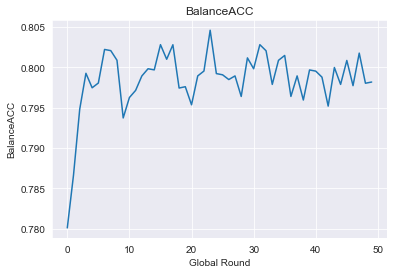

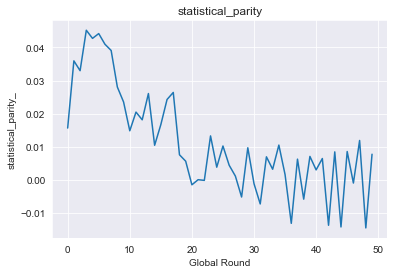

In [14]:
#simple federated learning
trade_off=[]
epsilon = 1
for i in range(len(BalanceACC_)):
    
    trade_off.append((1+epsilon**2)*((BalanceACC_[i]*(1-abs(eqop_[i])))/(epsilon*BalanceACC_[i]+(1-abs(eqop_[i])))))
index = trade_off.index(max(trade_off[0:-1], key=abs))
print(sensitivity_[index])
print(specificity_[index])
print(BalanceACC_[index])
print(G_mean_[index])
print(FP_rate_[index])
print(FN_rate_[index])
print(accuracy_[index])
print(statistical_parity_[index])
print(eqop_[index])
print(statistical_parity_.index(min(statistical_parity_[0:-1], key=abs)))
print(BalanceACC_.index(max(BalanceACC_[0:-1], key=abs)))
print(trade_off.index(max(trade_off[0:-1], key=abs)))
destination = "./results/law/eqop/"
client="10-copy-"
output_file = open(destination+client+"-client-bal_acc.txt", "w+")
output_file.write(str(BalanceACC_))
output_file.close()

output_file = open(destination+client+"-client-sen.txt", "w+")
output_file.write(str(sensitivity_))
output_file.close()

output_file = open(destination+client+"-client-spc.txt", "w+")
output_file.write(str(specificity_))
output_file.close()

output_file = open(destination+client+"-client-gmean.txt", "w+")
output_file.write(str(G_mean_))
output_file.close()

output_file = open(destination+client+"-client-fp_rate.txt", "w+")
output_file.write(str(FP_rate_))
output_file.close()

output_file = open(destination+client+"-client-fn_rate.txt", "w+")
output_file.write(str(FN_rate_))
output_file.close()

output_file = open(destination+client+"-client-sp.txt", "w+")
output_file.write(str(statistical_parity_))
output_file.close()

output_file = open(destination+client+"-client-eqop.txt", "w+")
output_file.write(str(eqop_))
output_file.close()
print(index)
#pyplot.plot(BalanceACC_)
plt.plot(BalanceACC_)
plt.title('BalanceACC')
plt.xlabel('Global Round')
plt.ylabel('BalanceACC')
plt.show()
plt.plot(statistical_parity_)
plt.title('statistical_parity')
plt.xlabel('Global Round')
plt.ylabel('statistical_parity_')
plt.show()

In [15]:
print(abs(-1))

1


##### 